In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [2]:
import argoverse
from argoverse.map_representation.map_api import ArgoverseMap
from argoverse.data_loading.argoverse_forecasting_loader import ArgoverseForecastingLoader
from argoverse.data_loading.argoverse_tracking_loader import ArgoverseTrackingLoader

def get_point_all_tracking(argoverse_loader):
    all_points_pit = []
    all_points_mia = []
    for argoverse_data in argoverse_loader:
        for frame in range(argoverse_data.num_lidar_frame):
            pose = argoverse_data.get_pose(frame)
            if argoverse_data.city_name == 'PIT':
                all_points_pit.append(pose.translation[0:2]) 
            elif argoverse_data.city_name == 'MIA':
                all_points_mia.append(pose.translation[0:2]) 
            else:
                return []
    return [all_points_pit,all_points_mia]

def get_point_all_forecasting(argoverse_loader):
    all_points_pit = []
    all_points_mia = []
    for argoverse_data in argoverse_loader:
        df = argoverse_data.seq_df
        df = df[df.OBJECT_TYPE == 'AV']
        city_name = df.CITY_NAME[0]
        for i,item in df.iterrows():
            if city_name == 'PIT':
                all_points_pit.append([item['X'],item['Y']])
            elif city_name == 'MIA':
                all_points_mia.append([item['X'],item['Y']])
            else:
                return []

    return [all_points_pit,all_points_mia]

##test heatmap visualization

def density_scatter( x , y, ax = None, sort = True, bins = 20, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    x = np.array(x)
    y = np.array(y)
    if ax is None :
        fig , ax = plt.subplots()
    #ax.grid(True,which="majorminor",ls="-", color='0.65',zorder=-1)
    data , x_e, y_e = np.histogram2d( x, y, bins = bins)

    data[np.where(data >=100000)] = 100000
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False )
    #z = [int(i) for i in z]
    # Sort the points by density, so that the densest points are plotted last
    if sort :
        idx = z.argsort()
        x, y, z = x[idx], y[idx], z[idx]

    sc = ax.scatter( x, y, c=z, **kwargs )

    return ax,sc

In [3]:
root_dir_tracking = '/Users/psangkloy/Downloads/argoverse-tracking 6/train3'
root_dir_forecasting = '/Users/psangkloy/Downloads/val/data/'

am = ArgoverseMap()
argoverse_loader_tracking = ArgoverseTrackingLoader(root_dir_tracking)
argoverse_loader_forecasting = ArgoverseForecastingLoader(root_dir_forecasting)

lane_polygons_mia = am.get_vector_map_lane_polygons('MIA')
lane_polygons_pit = am.get_vector_map_lane_polygons('PIT')

ERROR:argoverse.data_loading.synchronization_database:No corresponding image: 103.644392 > 100.0 ms
ERROR:argoverse.data_loading.synchronization_database:No corresponding image: 103.646672 > 100.0 ms


# 3D Tracking dataset

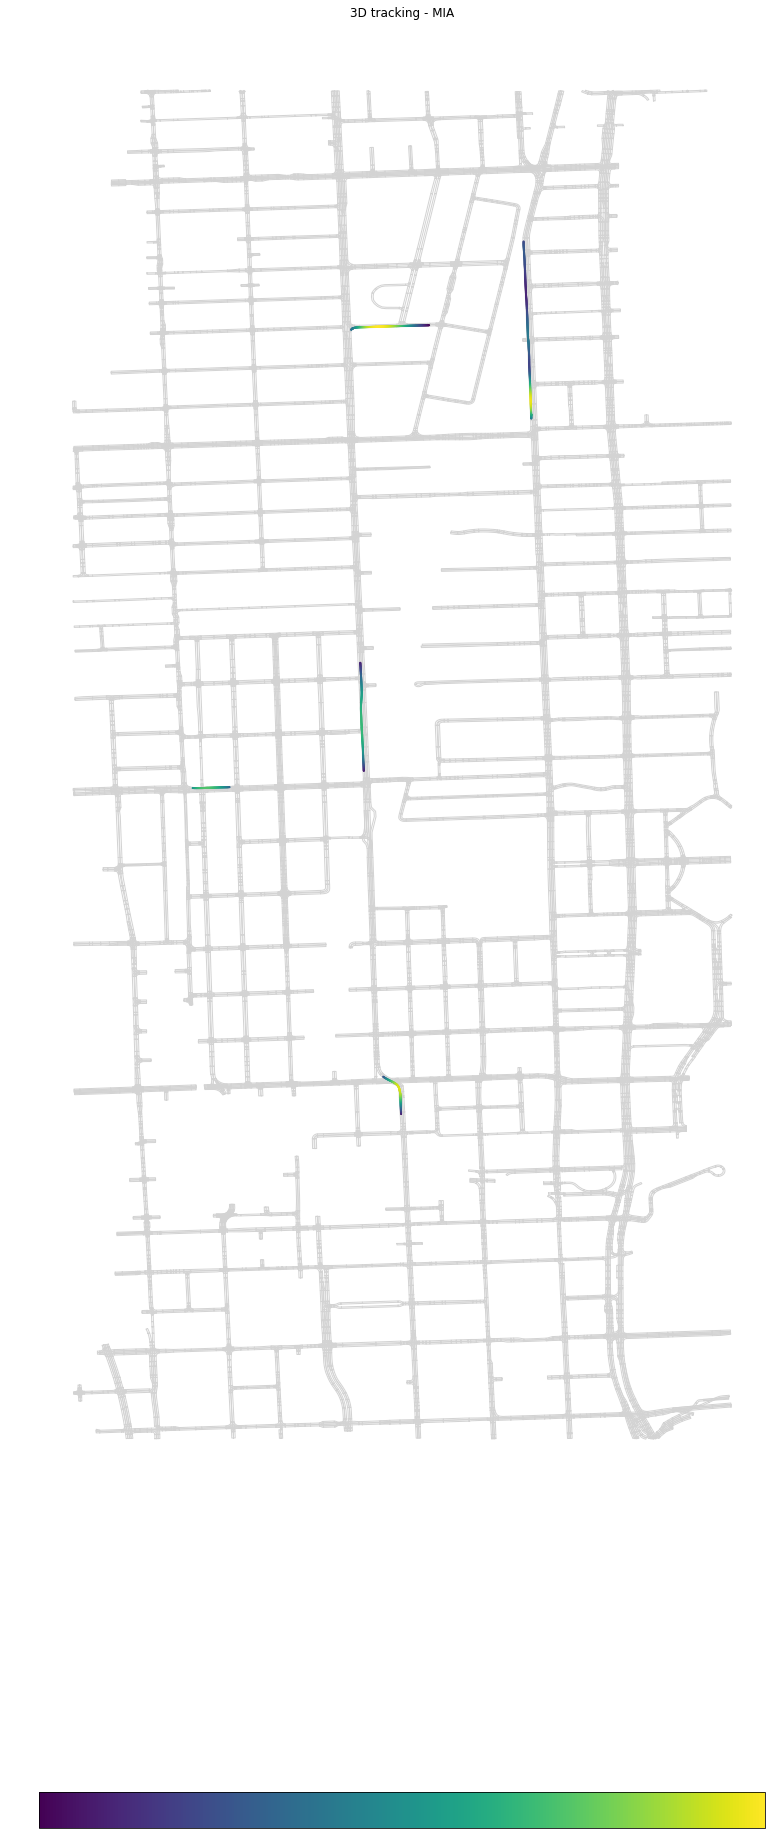

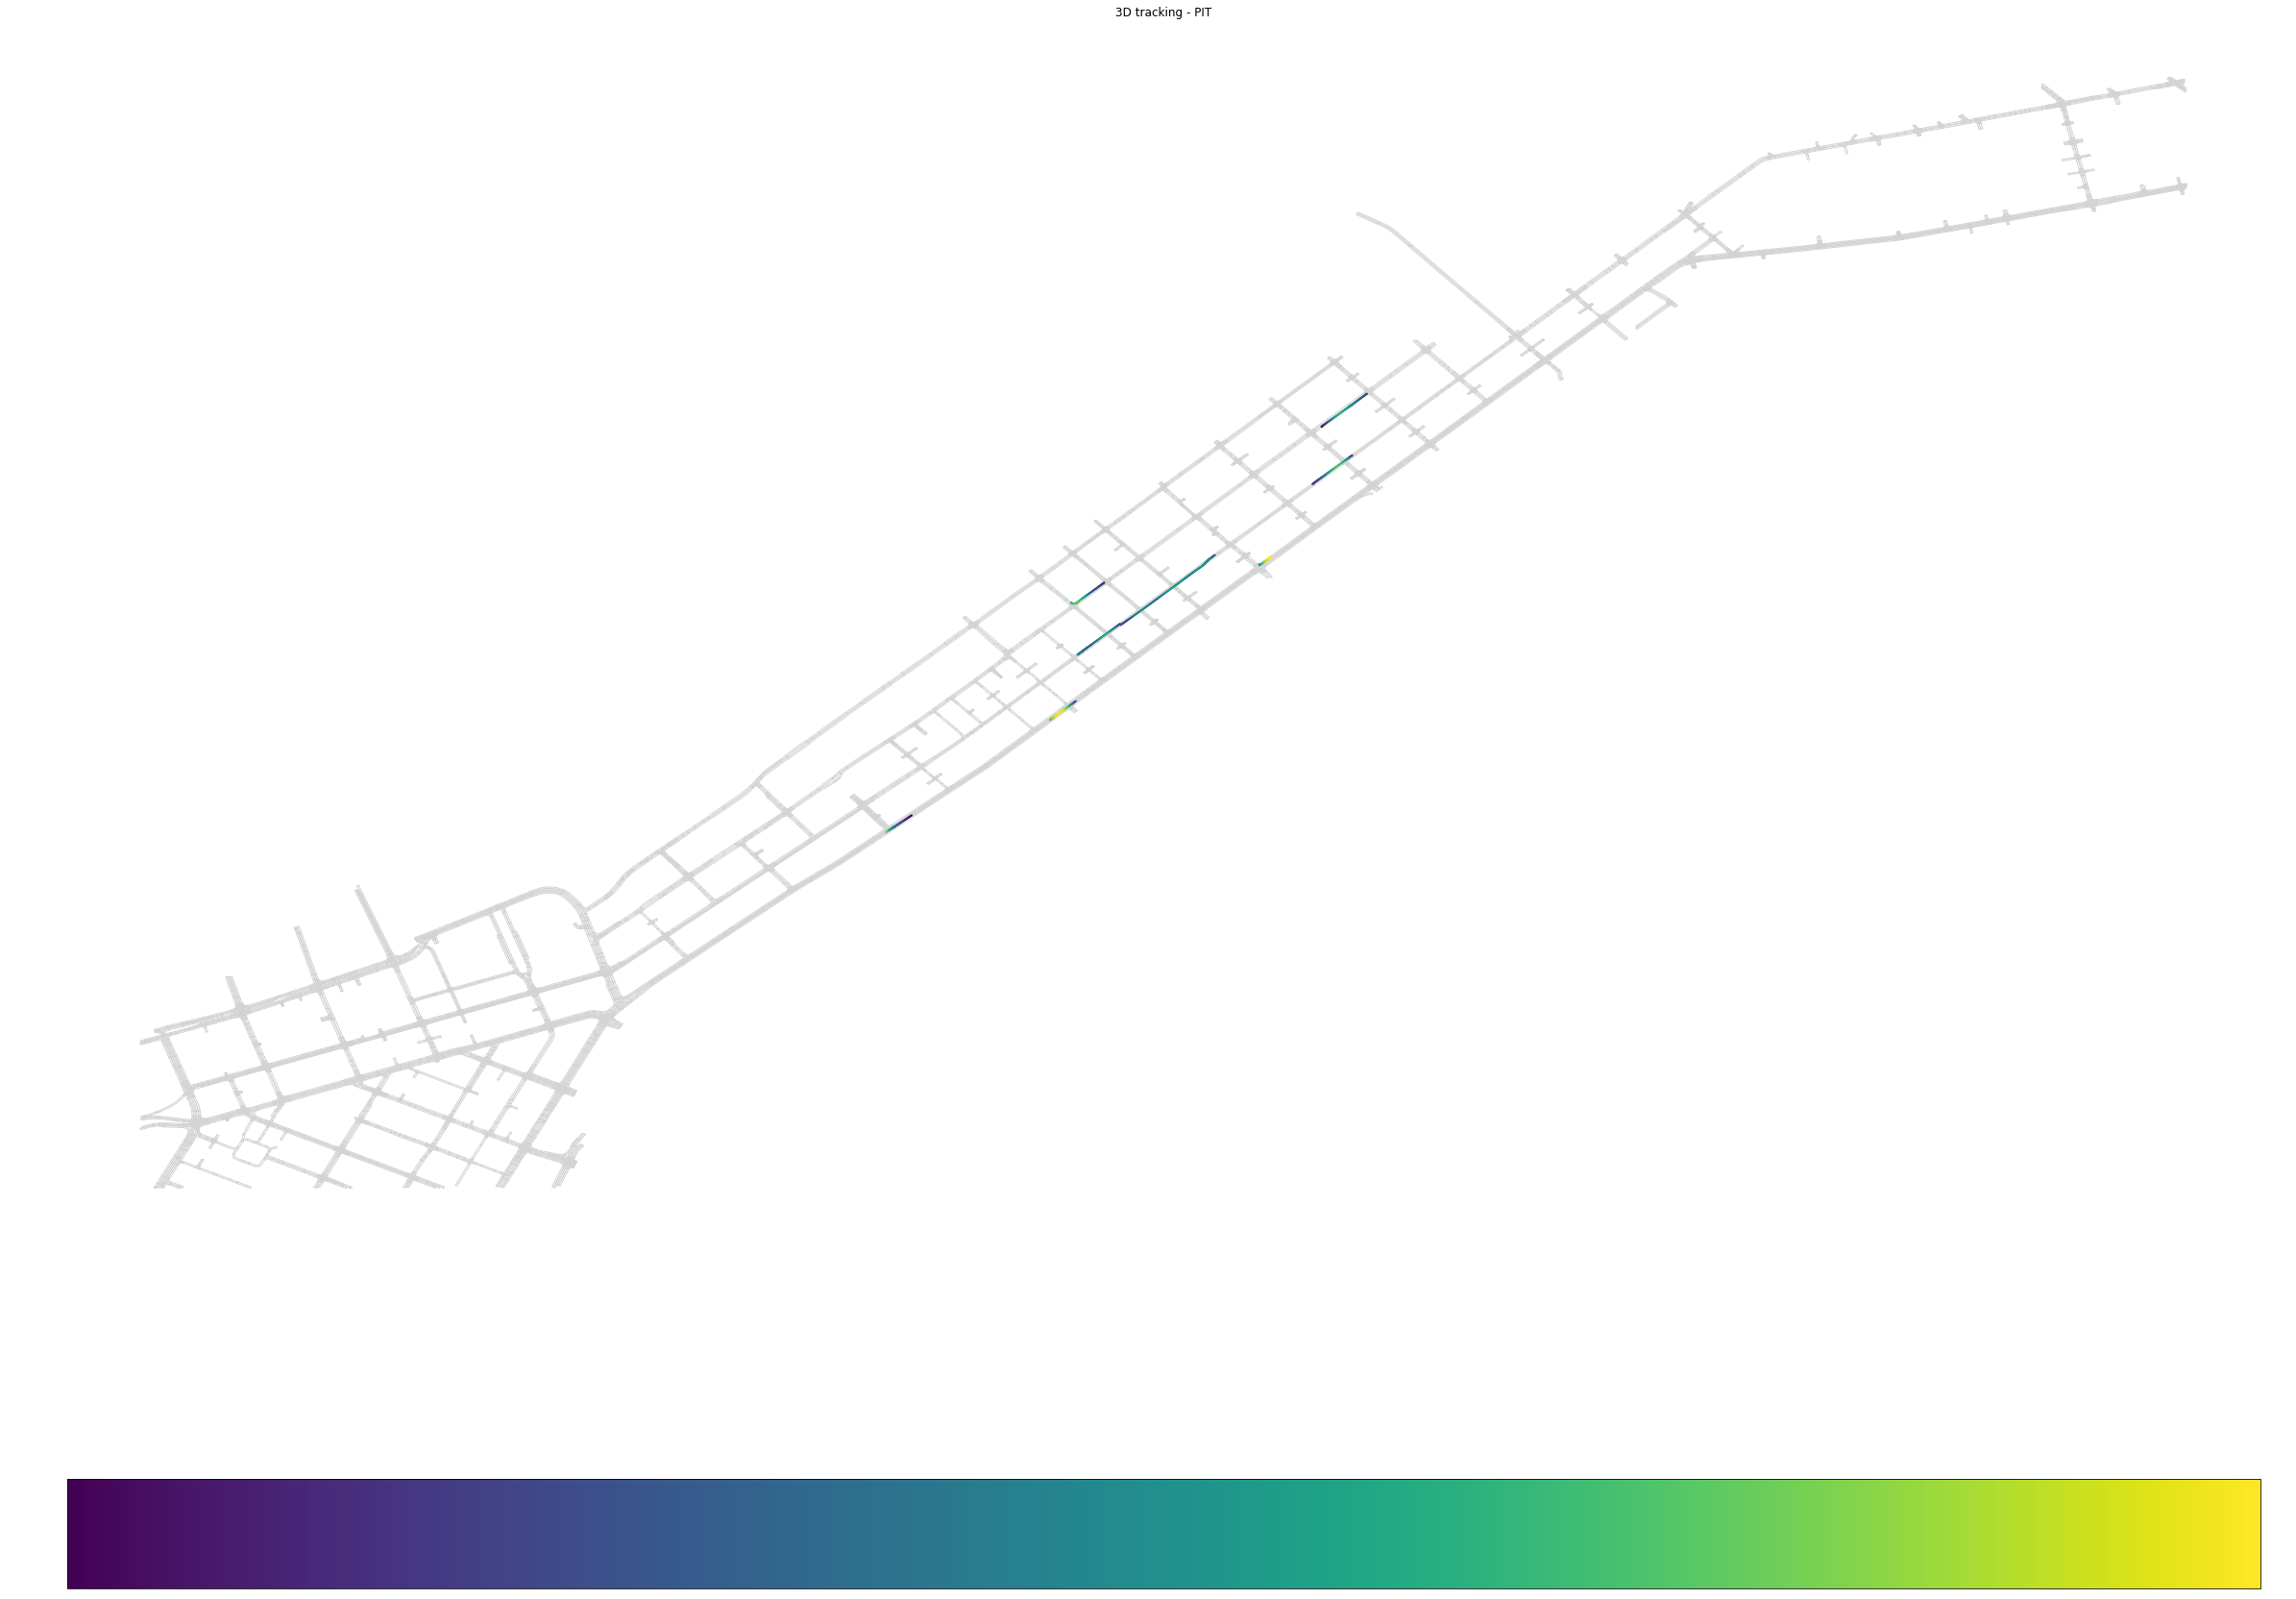

In [4]:
list_point_all_pitt, list_point_all_mia  = get_point_all_tracking(argoverse_loader_tracking)

#MIA
x_all, y_all = np.transpose(list_point_all_mia)

from scipy.interpolate import interpn

figsize = (13,35)
fig,ax = plt.subplots(figsize=figsize)
ax,sc = density_scatter(x_all,y_all,ax=ax,bins=figsize,s=1,sort=True,zorder=10)
cbar = plt.colorbar(sc,label='',orientation="horizontal",fraction=0.07,anchor=(1.0,0.0))
cbar.ax.tick_params(labelsize=24)
cbar.set_ticks([])

for poly in lane_polygons_mia:
    xy_lane = poly.T
    ax.plot(xy_lane[0],xy_lane[1], color='lightgrey', alpha=1,
                    linewidth=1,  zorder=1)

plt.axis('off')
plt.title('3D tracking - MIA')
plt.show()

#PIT
x_all, y_all = np.transpose(list_point_all_pitt)
figsize = (42,30)
fig,ax = plt.subplots(figsize=figsize)
ax,sc = density_scatter(x_all,y_all,ax=ax,bins=figsize,s=1,sort=True,zorder=10)
cbar = plt.colorbar(sc,label='',orientation="horizontal",fraction=0.07,anchor=(1.0,0.0))
cbar.ax.tick_params(labelsize=24)
cbar.set_ticks([])

for poly in lane_polygons_pit:
    xy_lane = poly.T
    ax.plot(xy_lane[0],xy_lane[1], color='lightgrey', alpha=1,
                    linewidth=1,  zorder=1)

plt.axis('off')
plt.title('3D tracking - PIT')
plt.show()


# Forecasting dataset

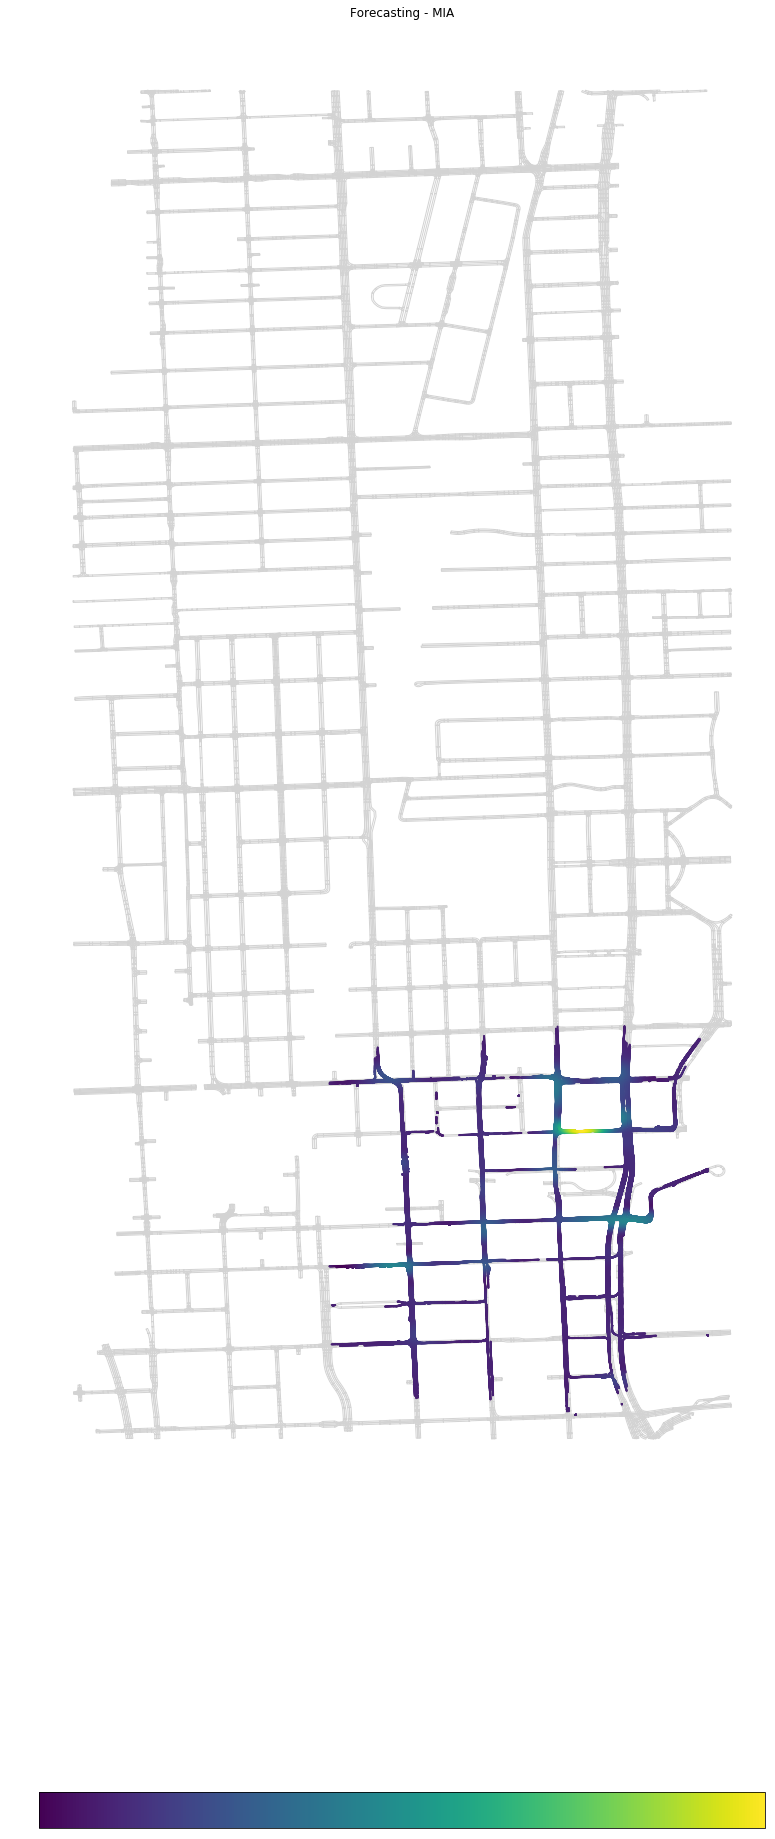

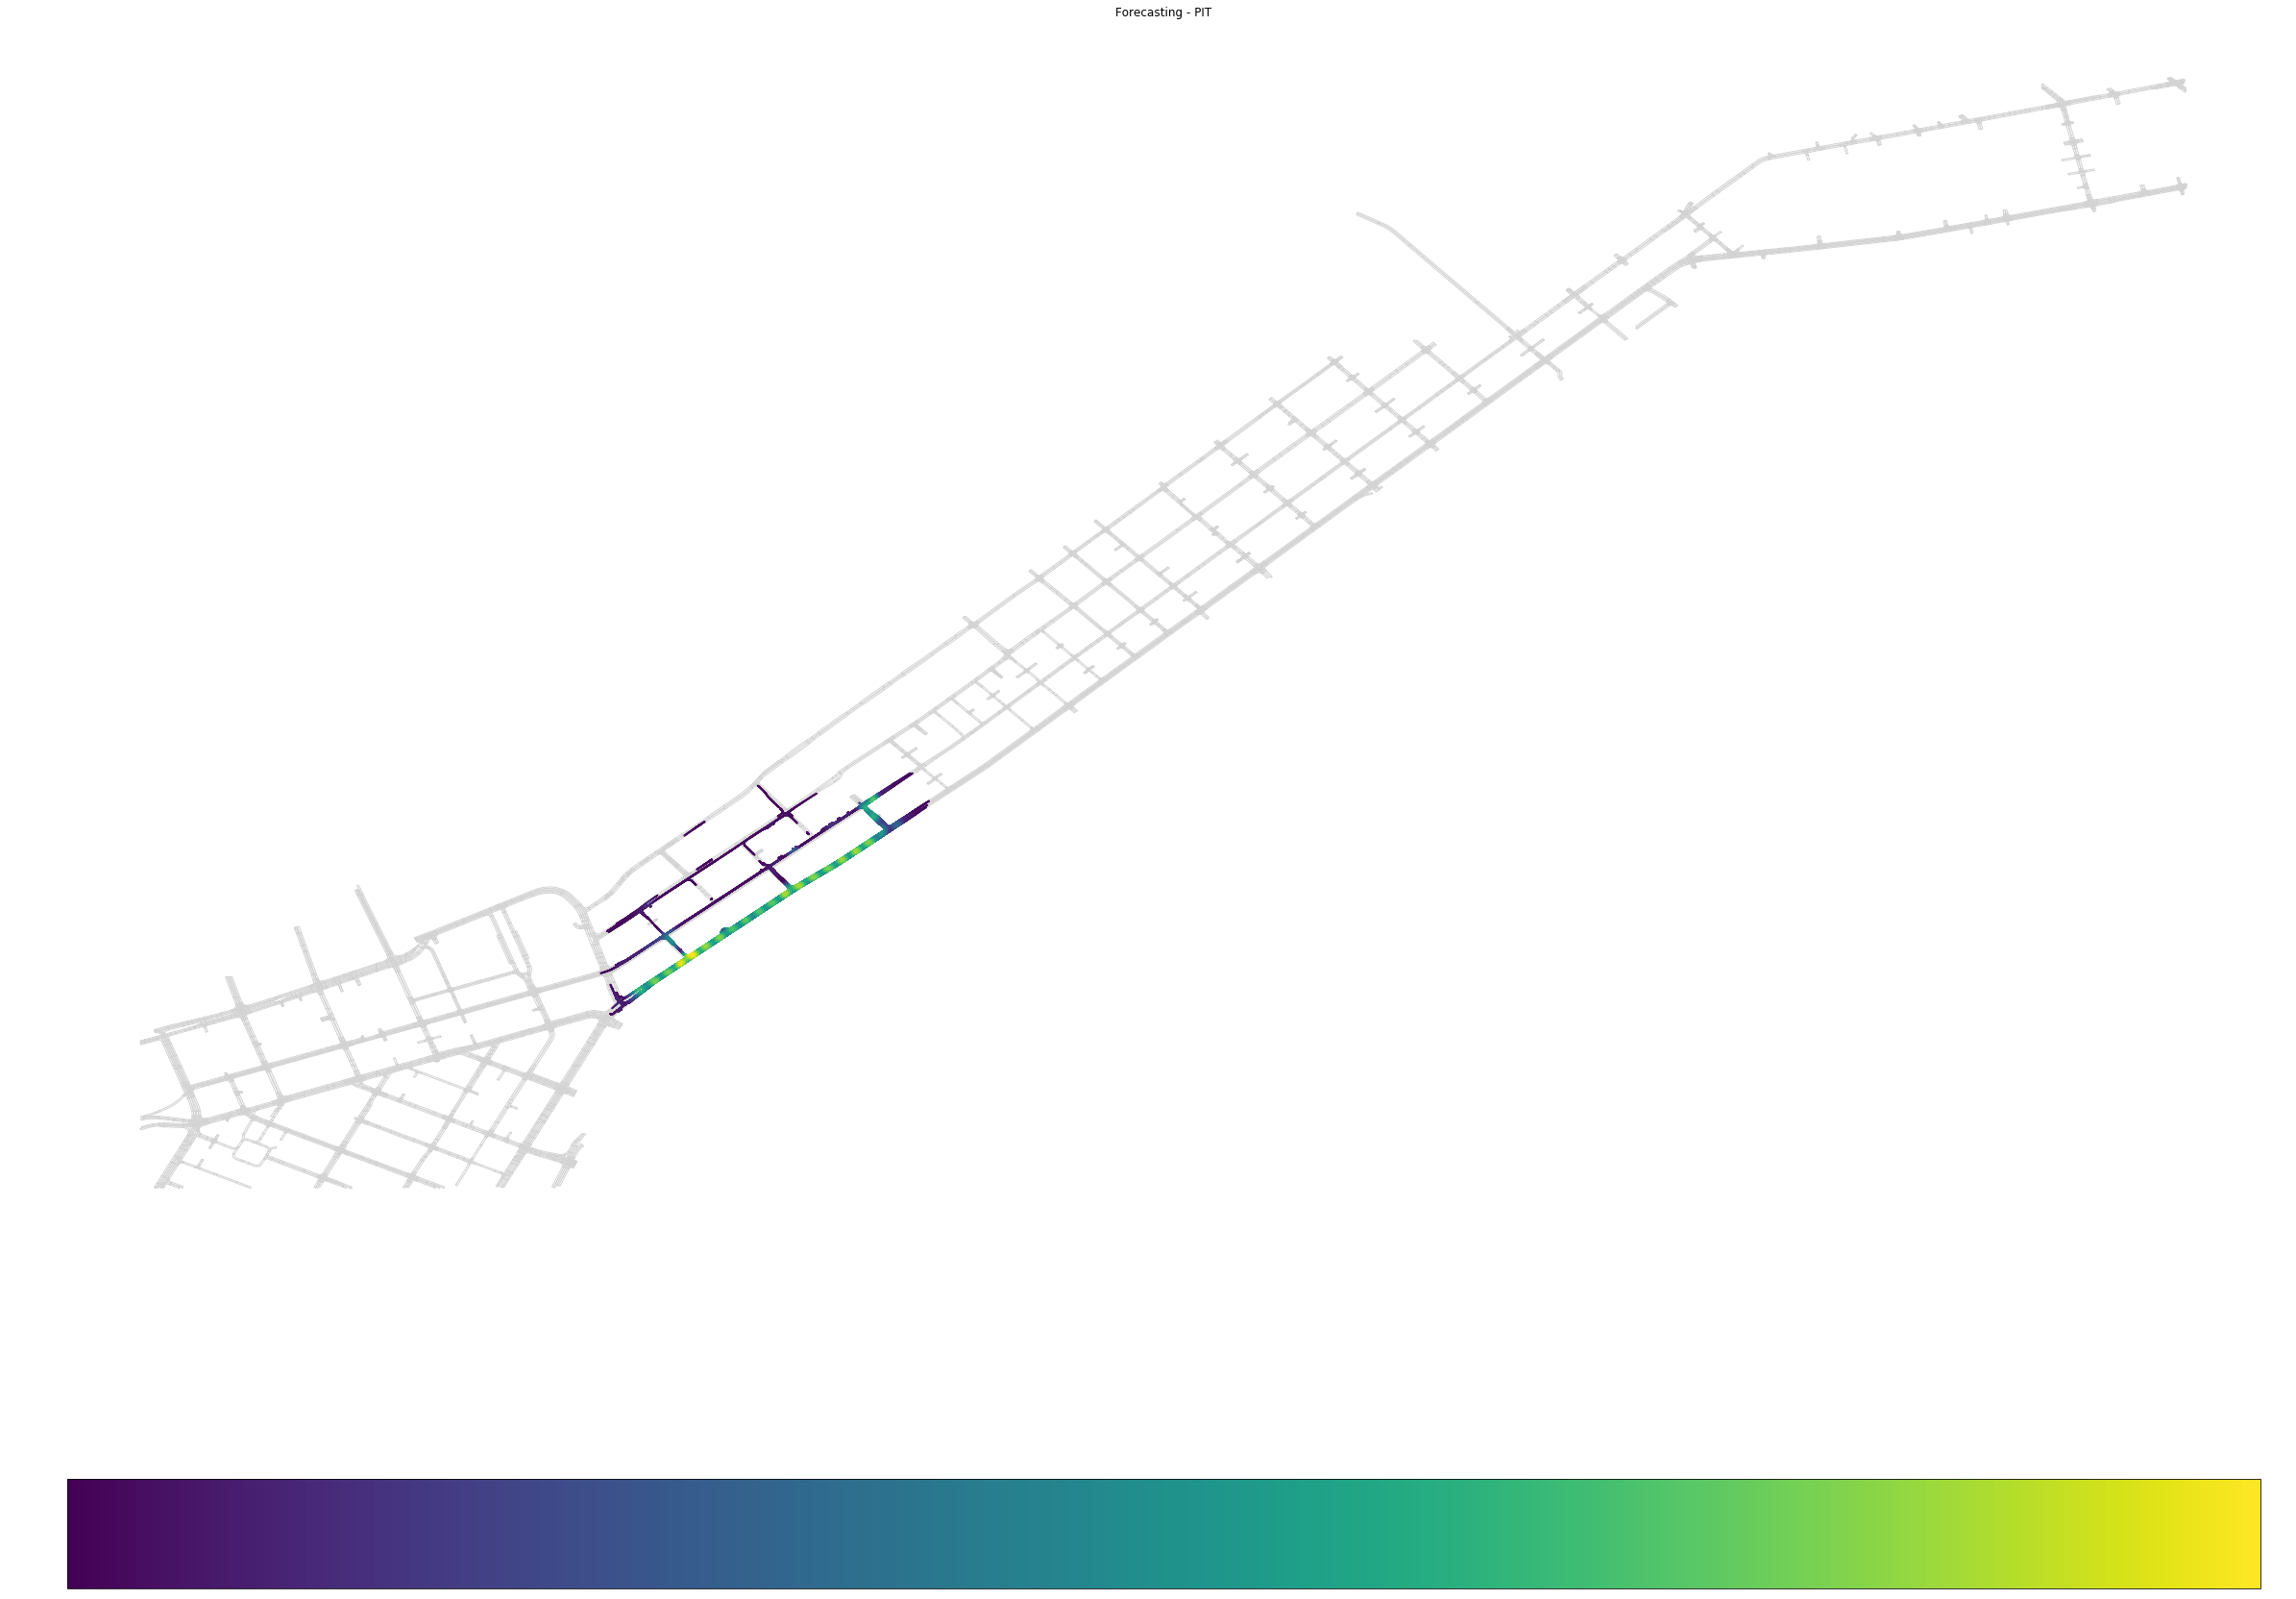

In [5]:
list_point_all_pitt, list_point_all_mia  = get_point_all_forecasting(argoverse_loader_forecasting)

#MIA
x_all, y_all = np.transpose(list_point_all_mia)

from scipy.interpolate import interpn

figsize = (13,35)
fig,ax = plt.subplots(figsize=figsize)
ax,sc = density_scatter(x_all,y_all,ax=ax,bins=figsize,s=1,sort=True,zorder=10)
cbar = plt.colorbar(sc,label='',orientation="horizontal",fraction=0.07,anchor=(1.0,0.0))
cbar.ax.tick_params(labelsize=24)
cbar.set_ticks([])

for poly in lane_polygons_mia:
    xy_lane = poly.T
    ax.plot(xy_lane[0],xy_lane[1], color='lightgrey', alpha=1,
                    linewidth=1,  zorder=1)

plt.axis('off')
plt.title('Forecasting - MIA')
plt.show()

#PIT
x_all, y_all = np.transpose(list_point_all_pitt)
figsize = (42,30)
fig,ax = plt.subplots(figsize=figsize)
ax,sc = density_scatter(x_all,y_all,ax=ax,bins=figsize,s=1,sort=True,zorder=10)
cbar = plt.colorbar(sc,label='',orientation="horizontal",fraction=0.07,anchor=(1.0,0.0))
cbar.ax.tick_params(labelsize=24)
cbar.set_ticks([])

for poly in lane_polygons_pit:
    xy_lane = poly.T
    ax.plot(xy_lane[0],xy_lane[1], color='lightgrey', alpha=1,
                    linewidth=1,  zorder=1)

plt.axis('off')
plt.title('Forecasting - PIT')
plt.show()
